## Simple_lr

In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes.data.shape

(442, 10)

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [10]:
np.corrcoef(diabetes.data.T,diabetes.target)[:,-1]

array([ 0.18788875,  0.043062  ,  0.58645013,  0.44148385,  0.21202248,
        0.17405359, -0.39478925,  0.43045288,  0.56588343,  0.38248348,
        1.        ])

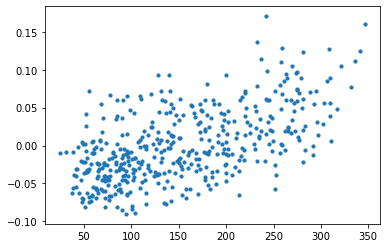

In [11]:
plt.scatter(diabetes.target,diabetes.data[:,2],s=10)

In [12]:
X = diabetes.data[:,np.newaxis,2]
y = diabetes.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [15]:
model.intercept_

150.98364802645432

In [16]:
model.coef_

array([949.89305527])

In [17]:
print("The learned regression model is:\n")
print("Target = %.2f + %.2f*%s"%(model.intercept_,model.coef_,diabetes.feature_names[2]))

The learned regression model is:

Target = 150.98 + 949.89*bmi


In [18]:
print("Mean square error: %.2f" %mean_squared_error(y_test,y_pred))
print("R square: %.2f"%r2_score(y_test,y_pred))

Mean square error: 4595.85
R square: 0.29


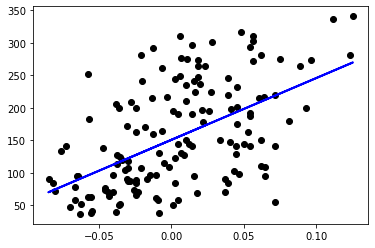

In [19]:
plt.scatter(X_test,y_test,color="k")
plt.plot(X_test,y_pred,linewidth=2,color="b")

## K fold Cross validation

In [20]:
from sklearn.model_selection import KFold,cross_validate
model = linear_model.LinearRegression()
kf = KFold(6,shuffle=True)
result = cross_validate(model,X,y, cv=kf)
score = result['test_score']
score

array([0.43843077, 0.28719924, 0.38663214, 0.24321035, 0.27376497,
       0.34865824])

In [21]:
performance = score.mean()
print('Average performance is %.4f.'% performance)

Average performance is 0.3296.


In [22]:
from sklearn.model_selection import cross_val_score
s = cross_val_score(model,X,y,cv=kf)
s

array([0.35132336, 0.32908986, 0.39495909, 0.18510001, 0.38125139,
       0.36690214])

In [23]:
performance = s.mean()
print('Average performance is %.4f.'% performance)

Average performance is 0.3348.


In [24]:
model = linear_model.Lasso()
kfold=KFold(6,shuffle=True)
s1 = cross_val_score(model,X,y,cv=kf)
s1

array([0.34082179, 0.24684232, 0.20045906, 0.29598425, 0.22572984,
       0.25914054])

In [25]:
performance = s1.mean()
print('Average performance is %.4f.'% performance)

Average performance is 0.2615.


## Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [27]:
iris = datasets.load_iris()

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [30]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 18,  2],
       [ 0,  1, 15]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.94

## Logistic Regression

In [33]:
from sklearn import datasets
bc = datasets.load_breast_cancer()

In [34]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [35]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
import numpy as np
import pandas as pd
bc_X = bc.data
bc_y = bc.target
X_train,X_test,y_train,y_test = train_test_split(bc_X,bc_y,test_size=0.33)

In [37]:
import seaborn as sns

In [41]:
df_new = pd.DataFrame(bc_X)
df_new.columns = bc.feature_names
df_new['target'] = bc_y

In [42]:
df_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

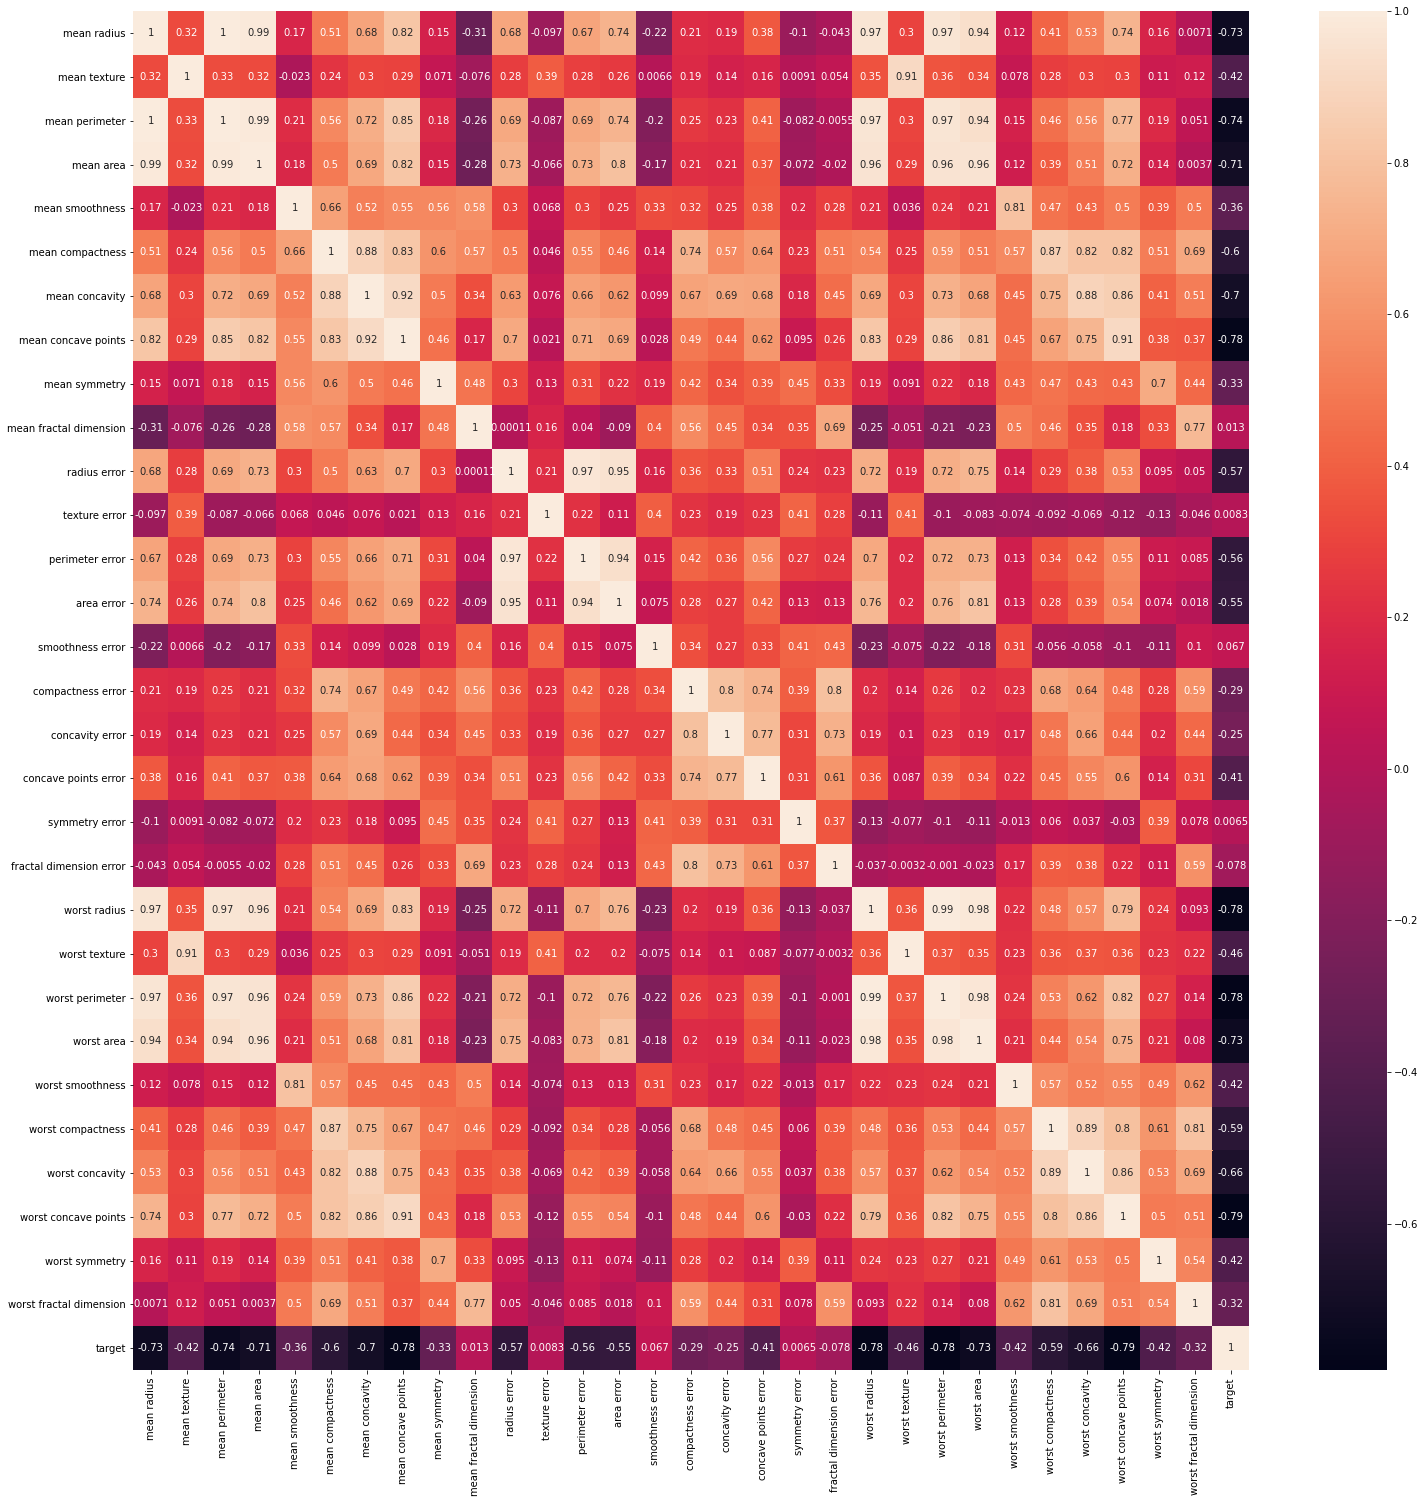

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(25, 25))
sns.heatmap(df_new.corr(),annot=True)

In [47]:
model = linear_model.LogisticRegression(solver = 'liblinear')
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9521276595744681

In [49]:
confusion_matrix(y_test,y_pred)

array([[ 64,   6],
       [  3, 115]], dtype=int64)

In [50]:
kf = KFold(6,shuffle=True)
s = cross_val_score(model,bc_X,bc_y,cv=kf)
s

array([0.94736842, 0.90526316, 0.97894737, 0.96842105, 0.95789474,
       0.96808511])

In [51]:
performance = s.mean()
print("Average performance is : %.4f"%performance)

Average performance is : 0.9543


In [52]:
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))

Accuracy = 0.9521


In [53]:
from sklearn.metrics import precision_score

In [54]:
precision_score(y_test,y_pred)

0.9504132231404959

In [55]:
from sklearn.metrics import hamming_loss

In [56]:
hamming_loss?

## Digits Classification

In [57]:
digits = datasets.load_digits()

In [58]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [59]:
digits.images.shape

(1797, 8, 8)

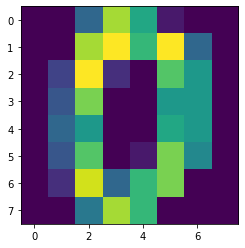

In [60]:
plt.imshow(digits.images[0])

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)
model = linear_model.LogisticRegression(multi_class="multinomial",penalty="none")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.9410774410774411

In [63]:
confusion_matrix(y_test,y_pred)

array([[61,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  1,  0,  0,  0,  0,  2,  3],
       [ 0,  1, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 51,  0,  2,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 63,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  2],
       [ 0,  3,  1,  1,  0,  1,  2,  0, 60,  1],
       [ 0,  0,  0,  1,  0,  3,  0,  0,  0, 58]], dtype=int64)